<class 'matplotlib.axes._axes.Axes'>


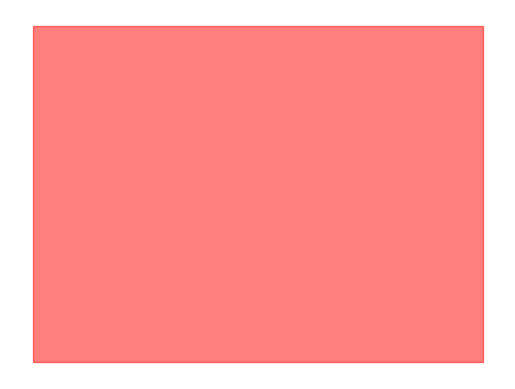

In [1]:
from colour import Color, RGB_TO_COLOR_NAMES
import matplotlib.pyplot as plt

x = [0, 0, 0.1, 0.1]
y = [0, 0.1, 0.1, 0]
fig, ax = plt.subplots()
ax.fill(x, y, color=(1, 0, 0, 0.5))
print(type(ax))
ax.axis('off')
plt.show()
plt.close()

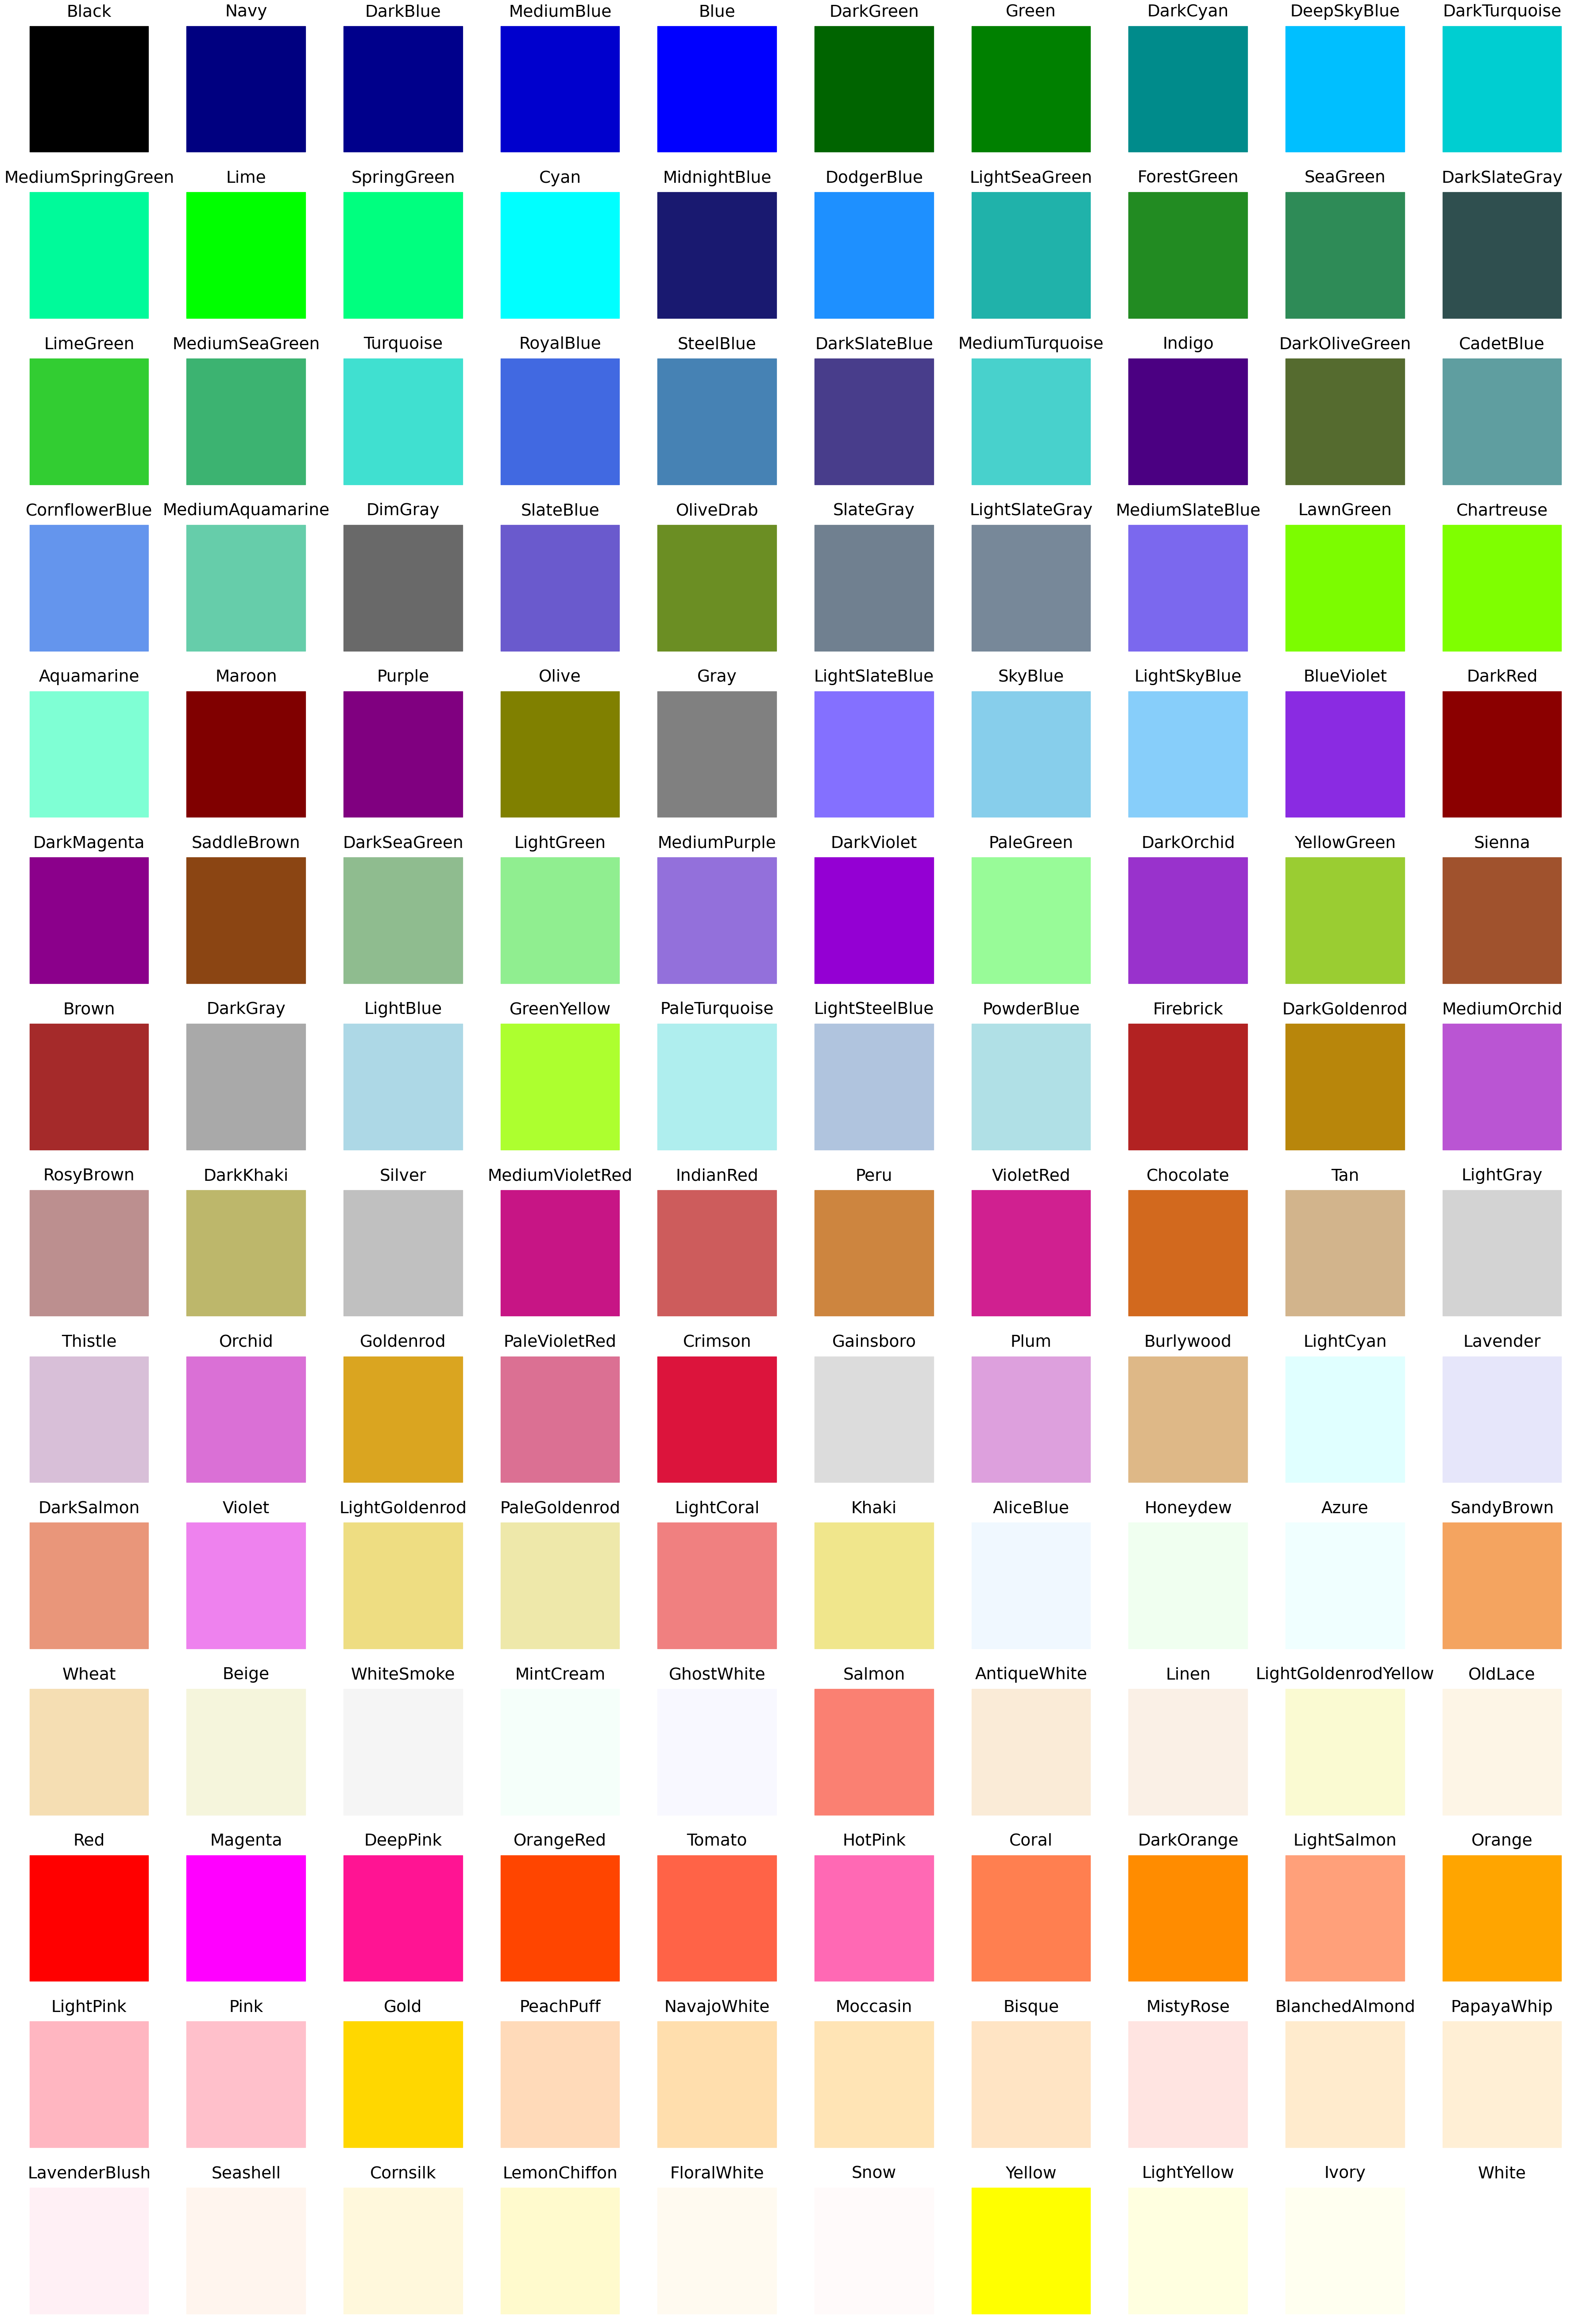

In [2]:
fig, axis = plt.subplots(14, 10, figsize=(50, 75), dpi=90)


axis = axis.ravel()

i = 0
for rgb, name in RGB_TO_COLOR_NAMES.items():
    axis[i].fill(x, y, color=[c / 255 for c in rgb])
    axis[i].set_axis_off()
    axis[i].set_title(name[0], fontdict={'fontsize': 30, 'fontweight': 100})
    i += 1
plt.show()

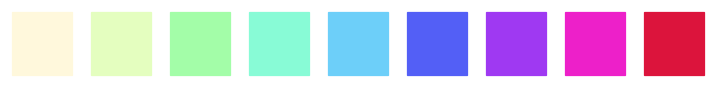

In [3]:
fig, axis = plt.subplots(1, 9, figsize=(10, 1), dpi=90)
axis = axis.ravel()

c1 = Color("Crimson")
c2 = Color("Cornsilk")
c1, c2 = c2, c1

i = 0
for color in c1.range_to(c2, 9):
    axis[i].fill(x, y, color=color.rgb)
    axis[i].set_axis_off()
    i += 1
plt.show()
plt.close()

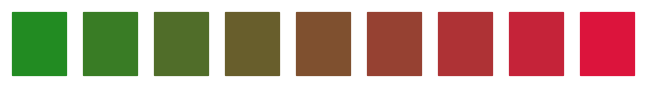

In [4]:
scale = 9

c1 = Color("ForestGreen")
c2 = Color("Crimson")

fig, axis = plt.subplots(1, scale, figsize=(scale, 1), dpi=90)
axis = axis.ravel()

progression = zip(
    [i / (scale - 1) for i in range(scale)],
    [i / (scale - 1) for i in range(scale - 1, -1, -1)]
)

i = 0
for p, q in progression:
    red = c1.red * q + c2.red * p
    green = c1.green * q + c2.green * p
    blue = c1.blue * q + c2.blue * p
    c = Color(red=red, green=green, blue=blue)
    axis[i].fill(x, y, color=c.rgb)
    axis[i].set_axis_off()
    i += 1

plt.show()
plt.close()

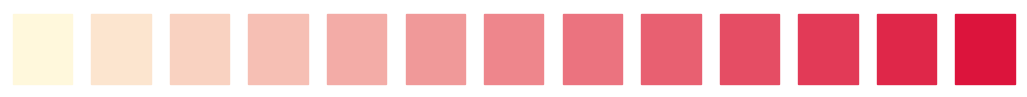

In [5]:
def rgb(color):
    return [min(_, 1) for _ in color.rgb]

def plt_colors(colors):
    fig, axis = plt.subplots(1, len(colors), figsize=(len(colors), 1))
    for i, c in enumerate(colors):
        axis[i].fill(x, y, color=rgb(c))
        axis[i].set_axis_off()

def get_2_colors_gradient(c1, c2, scale):
    progression = zip(
        [i / (scale - 1) for i in range(scale)],
        [i / (scale - 1) for i in range(scale - 1, -1, -1)]
    )
    return [
        Color(
            red=c1.red * q + c2.red * p,
            green=c1.green * q + c2.green * p,
            blue=c1.blue * q + c2.blue * p, 
        ) for p, q in progression
    ]

colors = get_2_colors_gradient(Color("Cornsilk"), Color("Crimson"), 13)
plt_colors(colors)

In [28]:
def get_intervals(scale, nb_colors):
    intervals = []
    nb_cubes = scale - nb_colors
    cpt = 0
    while nb_cubes > 0:
        cpt += 1
        pad = nb_cubes // (nb_colors - cpt)
        nb_cubes -= pad
        intervals.append(pad)
    return intervals

print(f"scale=5;colors=3;intervals={get_intervals(5, 3)}")
print(f"scale=7;colors=3;intervals={get_intervals(7, 3)}")
print(f"scale=13;colors=4;intervals={get_intervals(13, 4)}")
print(f"scale=15;colors=4;intervals={get_intervals(15, 4)}")

scale=5;colors=3;intervals=[1, 1]
scale=7;colors=3;intervals=[2, 2]
scale=13;colors=4;intervals=[3, 3, 3]
scale=15;colors=4;intervals=[3, 4, 4]


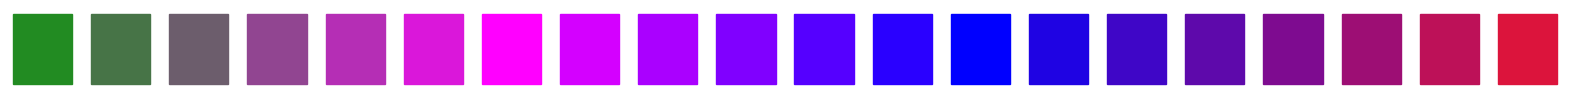

In [7]:
def get_colors_gradient(colors=None, scale=9):
    if colors is None:
        raise ValueError("colors args can't be null")
    if len(colors) >= scale:
        raise ValueError("You need to provide scale+1 different colors")
    intervals = get_intervals(scale, len(colors))
    results = list()
    for i, pad in enumerate(intervals):
        results += get_2_colors_gradient(colors[i], colors[i+1], pad+2)[:-1]
    results.append(colors[-1])
    return results

colors = [
    Color("ForestGreen"),
    Color("Magenta"),
    Color("Blue"),
    Color("Crimson"),
]
plt_colors(get_colors_gradient(colors=colors, scale=20))

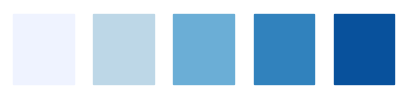

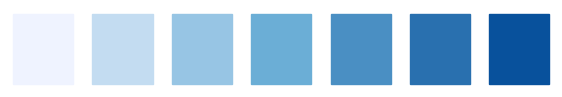

In [18]:
from utils.colors import get_multicolors_gradient, get_blue_gradient
hexes = ["#eff3ff", "#bdd7e7", "#6baed6", "#3182bd", "#08519c"]

plt_colors([Color(h) for h in hexes])
plt_colors(get_multicolors_gradient(colors=[Color(hexes[0]), Color(hexes[2]), Color(hexes[-1])], scale=7))


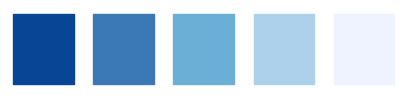

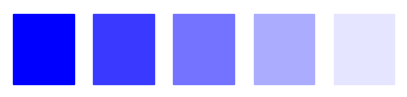

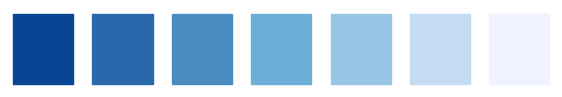

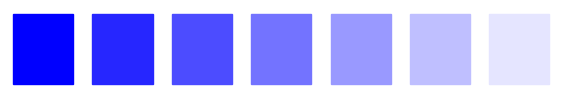

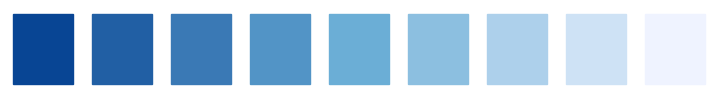

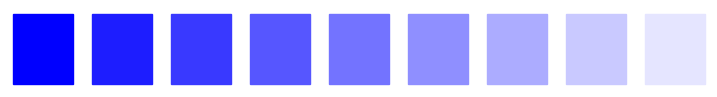

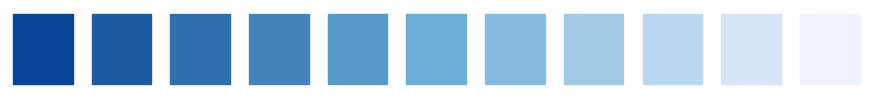

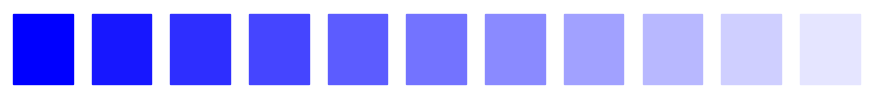

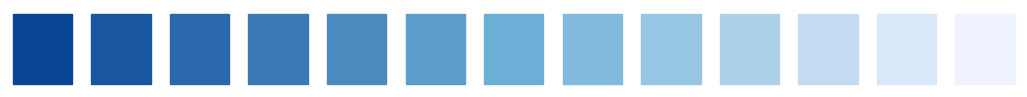

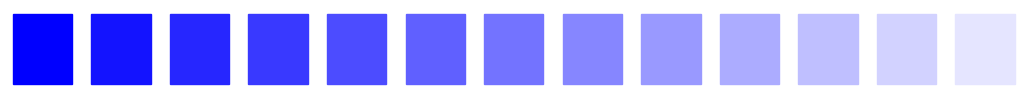

In [29]:
colors = [Color(h) for h in ("#084594", "#6baed6", "#eff3ff")]

for scale in range(5, 14, 2):
    plt_colors(get_multicolors_gradient(colors=colors, scale=scale))
    plt_colors(get_blue_gradient(scale))

In [24]:
[c.rgb for c in get_blue_gradient(9)]
# plt_colors(get_blue_gradient(9))

[(0.0, 0.0, 1.0),
 (0.11249999999999982, 0.11249999999999982, 1.0000000000000002),
 (0.22499999999999998, 0.22499999999999998, 0.9999999999999999),
 (0.3374999999999999, 0.3374999999999999, 1.0),
 (0.44999999999999984, 0.44999999999999984, 0.9999999999999999),
 (0.5625, 0.5625, 1.0),
 (0.6749999999999998, 0.6749999999999998, 1.0),
 (0.7874999999999996, 0.7874999999999996, 1.0),
 (0.8999999999999998, 0.8999999999999999, 0.9999999999999999)]

In [32]:
from users.models import User
s = User.objects.get(email__startswith="swann")
s.set_password("1234")
s.save()